<a href="https://colab.research.google.com/github/rcpang2024/LendingAnalysis/blob/main/RedVenturesCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Ventures Technical Case**

# Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/RedVentures
!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/RedVentures
Pre-Super_Day_candidate_dataset__28candidate_29.xlsx  RedVenturesCase.ipynb


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define file path for the dataset
file_path = 'Pre-Super_Day_candidate_dataset__28candidate_29.xlsx'

# Load the data into a dataframe
df = pd.read_excel(file_path)

df.head()

,User ID,applications,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


In [ ]:
# Make a copy of the original dataset for reference and in case we need to go back to it
df_copy = df.copy()
df_copy.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty,Yearly_Gross_Income
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0,60288
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0,69168
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0,48204
3,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0,37548
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0,50640


In [ ]:
# Retrive the data types of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User ID                     100000 non-null  object
 1   applications                100000 non-null  int64 
 2   Reason                      100000 non-null  object
 3   Loan_Amount                 100000 non-null  int64 
 4   FICO_score                  100000 non-null  int64 
 5   Fico_Score_group            100000 non-null  object
 6   Employment_Status           100000 non-null  object
 7   Employment_Sector           93593 non-null   object
 8   Monthly_Gross_Income        100000 non-null  int64 
 9   Monthly_Housing_Payment     100000 non-null  int64 
 10  Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 11  Lender                      100000 non-null  object
 12  Approved                    100000 non-null  int64 
 13  bounty                      10

#**Variable Relationship with Approvability**

#Dropping Unnecessary Columns

We can drop the User ID and applications columns because they aren't important to our analysis.

In [ ]:
# Drop unnecessary columns including: User ID and applications (we know that this value will always be 1)
df = df.drop(columns=['User ID', 'applications'])
df.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


# Feature Engineering
Create a new column: "Yearly_Gross_Income" which gives the annual gross income of the individual.

In [ ]:
df["Yearly_Gross_Income"] = df["Monthly_Gross_Income"] * 12
df.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty,Yearly_Gross_Income
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0,60288
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0,69168
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0,48204
3,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0,37548
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0,50640


0    89024
1    10976
Name: Approved, dtype: int64


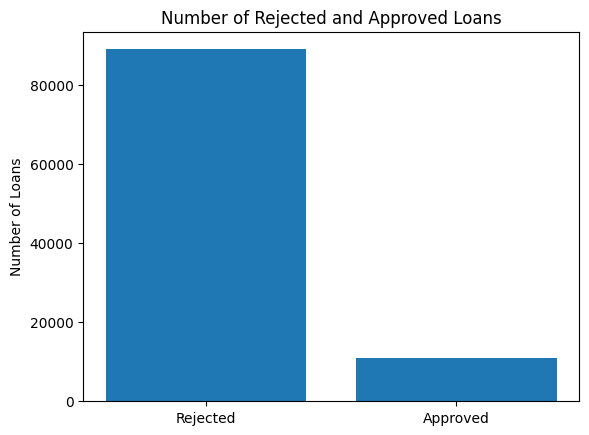

In [ ]:
# Finding the number of approved and unapproved loans
value_counts = df['Approved'].value_counts()
print(value_counts)

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, ['0', '1'])
plt.gca().set_xticklabels(['Rejected', 'Approved'])
plt.ylabel("Number of Loans")
plt.title("Number of Rejected and Approved Loans")
plt.show()

Loan_Amount                                 0.062599
FICO_score                                  0.203311
Monthly_Gross_Income                        0.128078
Monthly_Housing_Payment                     0.160487
Ever_Bankrupt_or_Foreclose                  0.001656
Yearly_Gross_Income                         0.130470
Reason_cover_an_unexpected_cost             0.009045
Reason_credit_card_refinancing              0.008106
Reason_debt_conslidation                    0.010975
Reason_home_improvement                     0.006021
Reason_major_purchase                       0.007840
Reason_other                                0.005121
Fico_Score_group_excellent                  0.022698
Fico_Score_group_fair                       0.020670
Fico_Score_group_good                       0.027645
Fico_Score_group_poor                       0.024325
Fico_Score_group_very_good                  0.039930
Employment_Status_full_time                 0.008273
Employment_Status_part_time                 0.

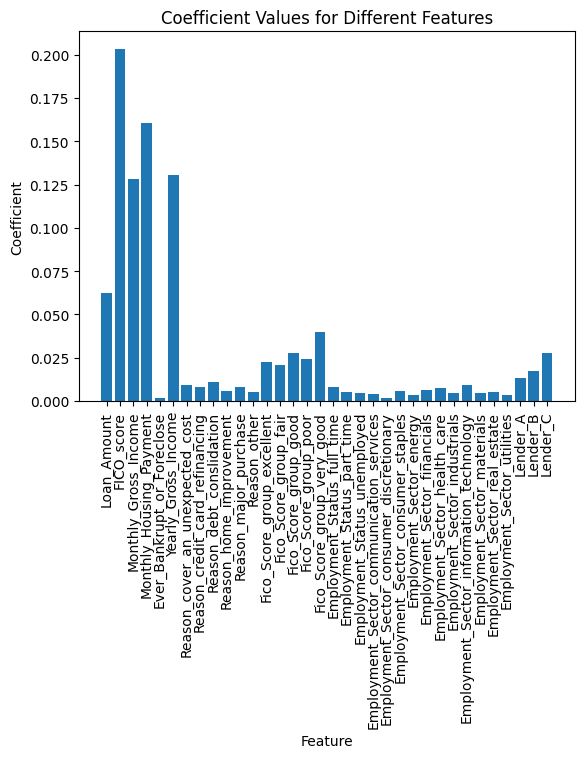

Accuracy of Random Forest Classifier is 89.47%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Drop columns
X = df.drop(columns=['Approved', 'bounty'])

# Target variable
y = df['Approved']

# Modify categorical features to numerical by using one-hot encode
X_encoded = pd.get_dummies(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=25, bootstrap=True, max_features='sqrt', min_samples_leaf=5, criterion='gini', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# See how important each feature is
feature_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns)
print(feature_importance)

plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient Values for Different Features")
plt.show()

# Accuracy of the prediction by the model
print(f"Accuracy of Random Forest Classifier is {round(accuracy_score(y_test, y_pred_rf) * 100, 2)}%")

From this analysis using Random Forest Classification, it appears that an individual's **FICO score** is the most important variable.

A person's **monthly and annual gross incomes**, **monthly housing payment**, and the **FICO score group** they belong to are also important.

Additioinally, the **loan amount** also has a high coefficient.

#**Lenders Approval Rates**

Begin with retrieving and visualizing the number of loan requests and percentage of loan approval rates.

A    55000
B    27500
C    17500
Name: Lender, dtype: int64


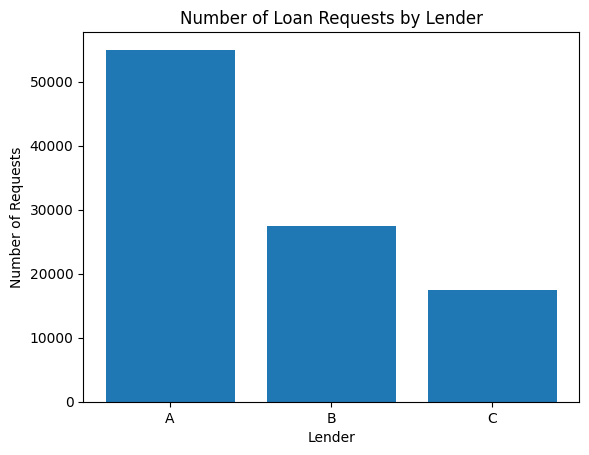

In [ ]:
# Retrieve total number of loan requests per lender
num_of_requests = df['Lender'].value_counts()
print(num_of_requests)

plt.bar(num_of_requests.index, num_of_requests.values)
plt.title("Number of Loan Requests by Lender")
plt.xlabel("Lender")
plt.ylabel("Number of Requests")
plt.show()

Lender
A    10.965455
B     7.127273
C    17.057143
Name: Approved, dtype: float64


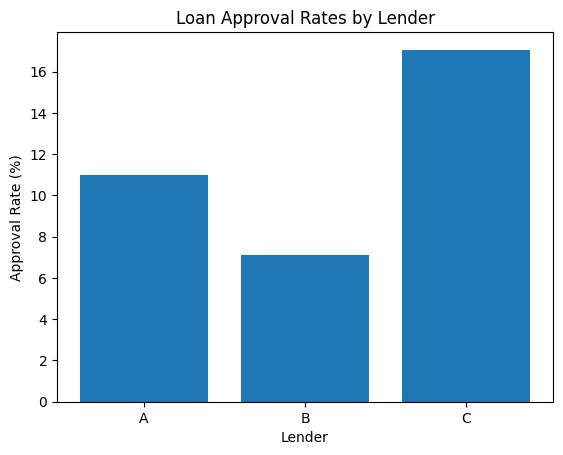

In [ ]:
# Getting the approval rate of each lender

# Retrieving the mean and multiplying by 100 to get a percentage
approval_rates = df.groupby('Lender')['Approved'].mean() * 100
print(approval_rates)

plt.bar(approval_rates.index, approval_rates.values)
plt.title("Loan Approval Rates by Lender")
plt.xlabel("Lender")
plt.ylabel("Approval Rate (%)")
plt.show()

Using what was learned in the previous section regarding the most important variables. We are now trying to find patterns between the different lenders as to when they are more likely to approve someone for a loan.

To do this, we will analyze the features that were most important from the Random Forest Classification. These are:


* Loan Amount
* FICO Score
* FICO Score Group
* Monthly Gross Income
* Annual Gross Income
* Monthly Housing Payment



#Numerical Features Analysis

In [ ]:
# Finding the means of the numerical features that were deemed important.
# Then group them by the lender and whether the loan was approved or not

approval_rates_feature_avgs = df.groupby(['Lender', 'Approved'])[['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment', "Yearly_Gross_Income"]].mean()
print(approval_rates_feature_avgs)

                  Loan_Amount  FICO_score  Monthly_Gross_Income  \
Lender Approved                                                   
A      0         45607.731422  621.845372           5802.614572   
       1         42417.509534  697.358481           7506.998674   
B      0         45486.491778  622.429366           5836.393070   
       1         41790.816327  732.108673           8053.576020   
C      0         46009.300723  615.368722           5101.539924   
       1         41135.678392  674.770519           6322.161809   

                 Monthly_Housing_Payment  Yearly_Gross_Income  
Lender Approved                                                
A      0                     1677.814842         69631.374870  
       1                     1697.039794         90083.984082  
B      0                     1733.769342         70036.716836  
       1                     1694.571939         96642.912245  
C      0                     1443.887427         61218.479091  
       1       

Lender  Approved
A       0           45607.731422
        1           42417.509534
B       0           45486.491778
        1           41790.816327
C       0           46009.300723
        1           41135.678392
Name: Loan_Amount, dtype: float64


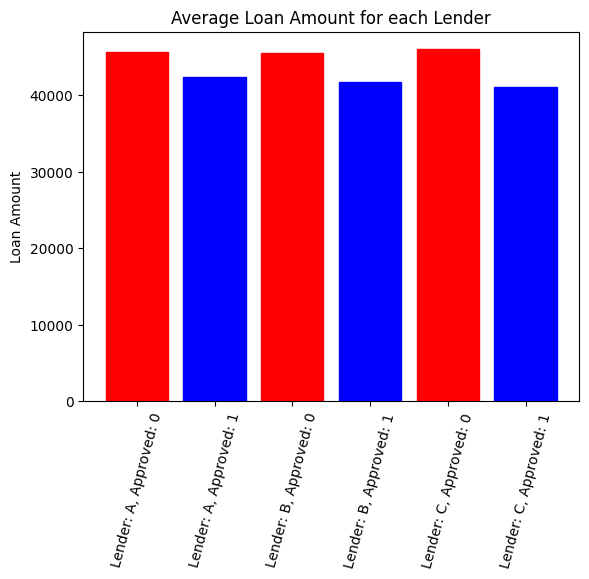

In [ ]:
# Loan Amount Mean
approval_rate_by_loan_amnt = df.groupby(['Lender', 'Approved'])['Loan_Amount'].mean()
print(approval_rate_by_loan_amnt)

# Solves issue of the x labels giving an error since it was a tuple
index_levels = [f'Lender: {lender}, Approved: {approved}' for lender, approved in approval_rate_by_loan_amnt.index]

bars = plt.bar(index_levels, approval_rate_by_loan_amnt.values)

# If the loan was rejected, the bar will be red
for i, bar in enumerate(bars):
  if approval_rate_by_loan_amnt.index[i][1] == 0:
    bar.set_color('red')
  else:
    bar.set_color('blue')

plt.xticks(rotation=75)
plt.ylabel("Loan Amount")
plt.title("Average Loan Amount for each Lender")
plt.show()

Lender  Approved
A       0           621.845372
        1           697.358481
B       0           622.429366
        1           732.108673
C       0           615.368722
        1           674.770519
Name: FICO_score, dtype: float64


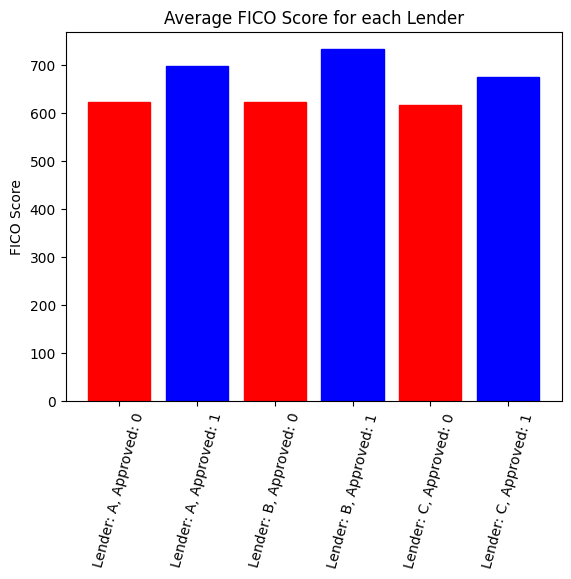

In [ ]:
# FICO Score Mean

approval_rate_by_fico = df.groupby(['Lender', 'Approved'])['FICO_score'].mean()
print(approval_rate_by_fico)
index_levels = [f'Lender: {lender}, Approved: {approved}' for lender, approved in approval_rate_by_fico.index]

bars = plt.bar(index_levels, approval_rate_by_fico.values)

for i, bar in enumerate(bars):
  if approval_rate_by_fico.index[i][1] == 0:
    bar.set_color('red')
  else:
    bar.set_color('blue')

plt.xticks(rotation=75)
plt.ylabel("FICO Score")
plt.title("Average FICO Score for each Lender")
plt.show()

Lender  Approved
A       0           5802.614572
        1           7506.998674
B       0           5836.393070
        1           8053.576020
C       0           5101.539924
        1           6322.161809
Name: Monthly_Gross_Income, dtype: float64


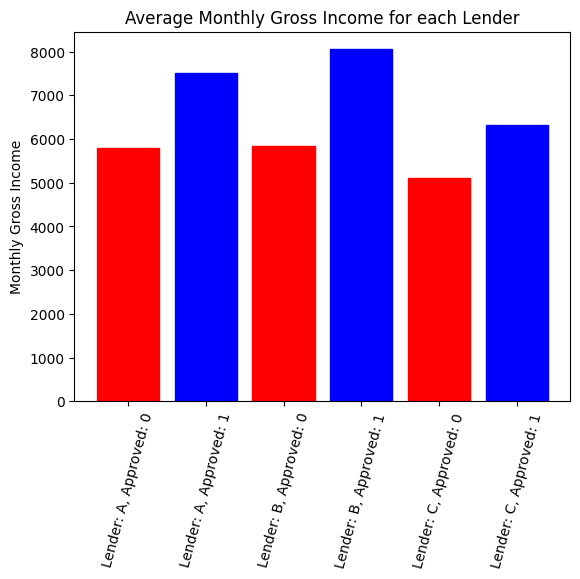

In [ ]:
# Monthly Gross Income Mean

approval_rate_by_income = df.groupby(['Lender', 'Approved'])['Monthly_Gross_Income'].mean()
print(approval_rate_by_income)
index_levels = [f'Lender: {lender}, Approved: {approved}' for lender, approved in approval_rate_by_income.index]

bars = plt.bar(index_levels, approval_rate_by_income.values)

for i, bar in enumerate(bars):
  if approval_rate_by_income.index[i][1] == 0:
    bar.set_color('red')
  else:
    bar.set_color('blue')

plt.xticks(rotation=75)
plt.ylabel("Monthly Gross Income")
plt.title("Average Monthly Gross Income for each Lender")
plt.show()

Lender  Approved
A       0           1677.814842
        1           1697.039794
B       0           1733.769342
        1           1694.571939
C       0           1443.887427
        1           1344.649581
Name: Monthly_Housing_Payment, dtype: float64


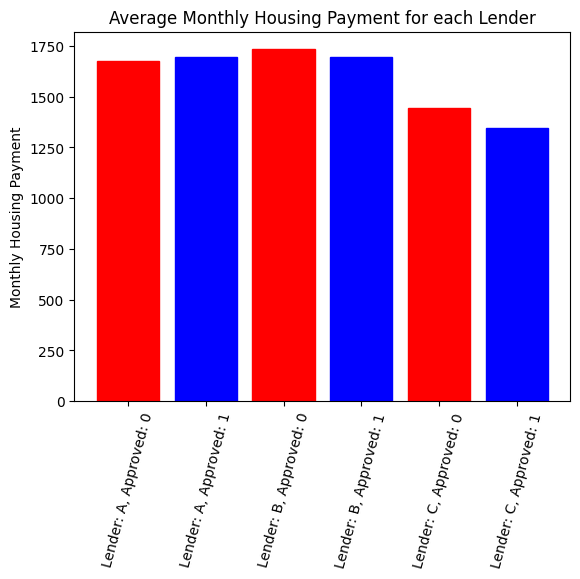

In [ ]:
# Monthly Housing Payment Mean

approval_rate_by_housing = df.groupby(['Lender', 'Approved'])['Monthly_Housing_Payment'].mean()
print(approval_rate_by_housing)
index_levels = [f'Lender: {lender}, Approved: {approved}' for lender, approved in approval_rate_by_housing.index]

bars = plt.bar(index_levels, approval_rate_by_housing.values)

for i, bar in enumerate(bars):
  if approval_rate_by_housing.index[i][1] == 0:
    bar.set_color('red')
  else:
    bar.set_color('blue')

plt.xticks(rotation=75)
plt.ylabel("Monthly Housing Payment")
plt.title("Average Monthly Housing Payment for each Lender")
plt.show()

Lender  Approved
A       0           69631.374870
        1           90083.984082
B       0           70036.716836
        1           96642.912245
C       0           61218.479091
        1           75865.941709
Name: Yearly_Gross_Income, dtype: float64


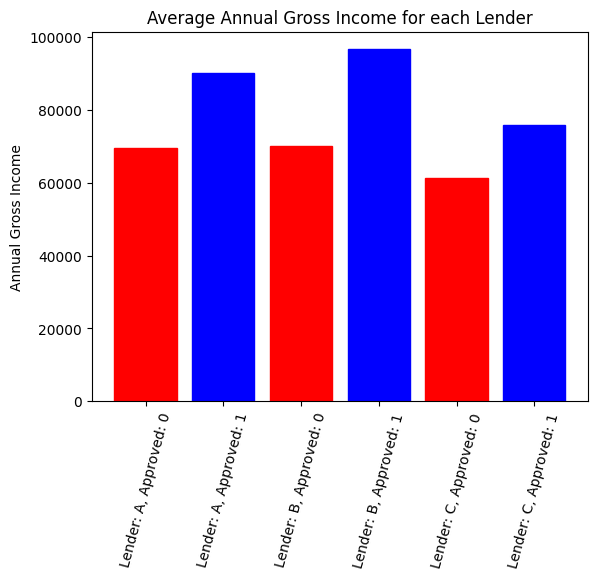

In [ ]:
# Annual Gross Income

approval_rate_by_annualInc = df.groupby(['Lender', 'Approved'])['Yearly_Gross_Income'].mean()
print(approval_rate_by_annualInc)
index_levels = [f'Lender: {lender}, Approved: {approved}' for lender, approved in approval_rate_by_annualInc.index]

bars = plt.bar(index_levels, approval_rate_by_annualInc.values)

for i, bar in enumerate(bars):
  if approval_rate_by_annualInc.index[i][1] == 0:
    bar.set_color('red')
  else:
    bar.set_color('blue')

plt.xticks(rotation=75)
plt.ylabel("Annual Gross Income")
plt.title("Average Annual Gross Income for each Lender")
plt.show()

In general:


*   A smaller loan amount is more likely to be approved
*   Higher FICO scores and gross income increases the likelihood of being approved for a loan

An interesting pattern emerges though. Lender B requires individuals to have a higher FICO score and gross income than either A or C.

Combined with the fact that Lender B has the lowest approval rate of the three, we can deduce that B requires higher standards for loan approval.



#Categorical Features Analysis

<ipython-input-18-eaaf0bf423ca>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_df['Fico_Score_group'] = approved_df['Fico_Score_group'].replace(fico_score_group_mapping)


Lender  Approved  Fico_Score_group
A       1         1                    411
                  2                   1285
                  3                   2876
                  4                    931
                  5                    528
B       1         2                    153
                  3                   1006
                  4                    528
                  5                    273
C       1         1                    382
                  2                    910
                  3                   1132
                  4                    360
                  5                    201
Name: Fico_Score_group, dtype: int64


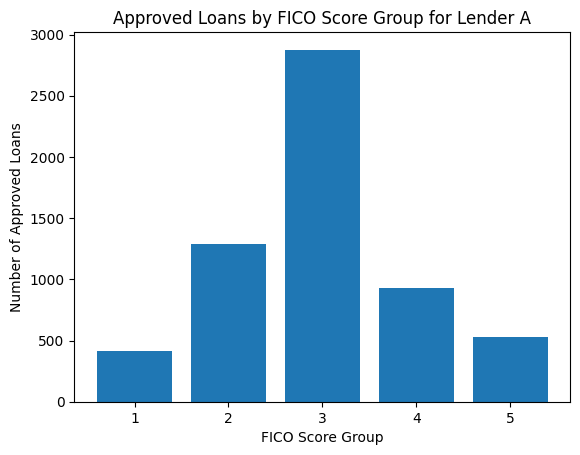

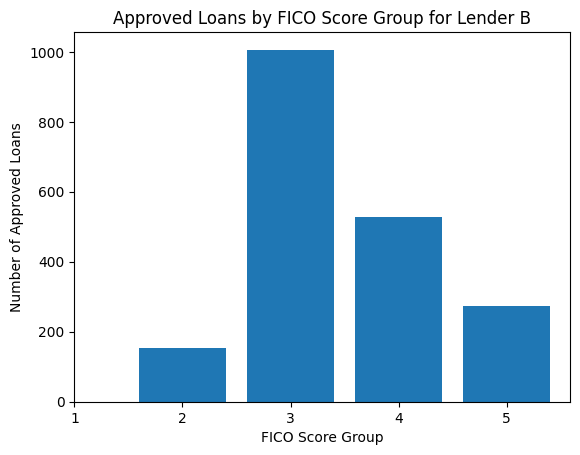

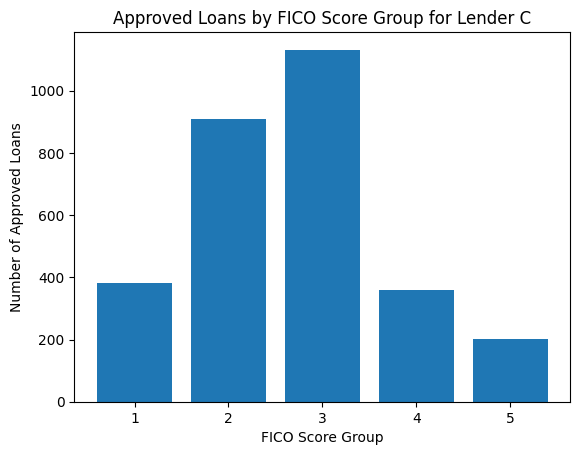

In [ ]:
# FICO Score Groups

# Map each group to a numerical value
fico_score_group_mapping = {
    'poor': 1,
    'fair': 2,
    'good': 3,
    'very_good': 4,
    'excellent': 5
}

# Only take into account the individuals who had their loans approved
approved_df = df[df['Approved'] == 1]

# Convert the strings to numbers
approved_df['Fico_Score_group'] = approved_df['Fico_Score_group'].replace(fico_score_group_mapping)

# Number of approved people from each FICO group for every lender
approval_rate_by_fico_group = approved_df.groupby(['Lender', 'Approved'])['Fico_Score_group'].value_counts()
print(approval_rate_by_fico_group.sort_index())

unique_lenders = approved_df['Lender'].unique()

# Prints out bar charts for how many people were approved from each FICO group for each lender
for lender in unique_lenders:
    lender_data = approved_df[approved_df['Lender'] == lender]

    fico_group = lender_data.groupby('Fico_Score_group').size()

    plt.bar(fico_group.index, fico_group.values)
    plt.xticks(range(1, 6))
    plt.xlabel("FICO Score Group")
    plt.ylabel('Number of Approved Loans')
    plt.title(f'Approved Loans by FICO Score Group for Lender {lender}')
    plt.show()


**Clear Differences**



*   Lender A is in the middle of the three lenders when it comes to standards for loaning
*   Lender B has higher standards to approve a loan including a higher FICO score and annual income and has the lowest approval rate
*   Lender C is more willing to lend to those with lower incomes and worse FICO scores



**Reliable Predictors**


*   A 'poor' FICO score is a guaranteed rejection for Lender B as not a single person with that rating was approved for a loan



#**Matching Customers to Lenders**

From the analysis in the previous sections, these are the general characteristics for people to be the best fit for each lender:

**Lender A Fit Characteristics:**
* People with FICO scores around 700
* Those with higher monthly house payments

**Lender B Fit Charactersitics:**
* People whose FICO score is 730+ and in the 'good', 'very good' or 'excellent' category
* Those with an annual income around $96,000

**Lender C Fit Characteristics:**
* Individuals with a 'poor' or 'fair' FICO score group rating and a FICO score less than 700
* Individuals whose annual gross income is around $75,000
* Those with monthly housing payments less than 1,500

From the analysis in the previous sections we know that Lender C has looser financial requirements to get a loan approved while also having a higher approval rate.

Lender  Approved
A       1           6031
B       1           1960
C       1           2985
Name: Approved, dtype: int64


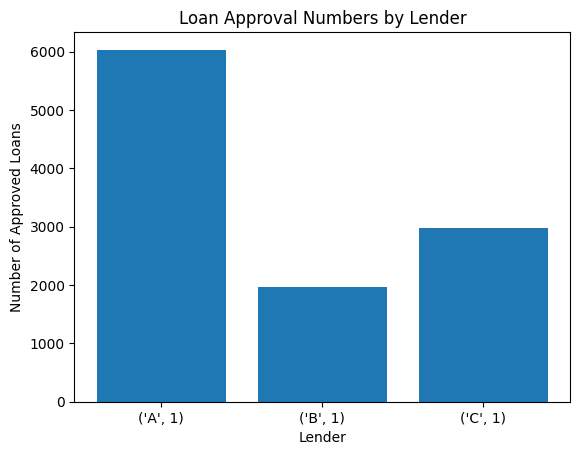

In [ ]:
# A = $250
# B = $350
# C = $150

# Retrieving the number of approved applications for each lender
approved_df = df[df['Approved'] == 1]
approval_numbers = approved_df.groupby('Lender')['Approved'].value_counts()
print(approval_numbers)

index_labels = [str(label) for label in approval_numbers.index]
plt.bar(index_labels, approval_numbers.values)
plt.title("Loan Approval Numbers by Lender")
plt.xlabel("Lender")
plt.ylabel("Number of Approved Loans")
plt.show()

Total Current Revenue:  2641500


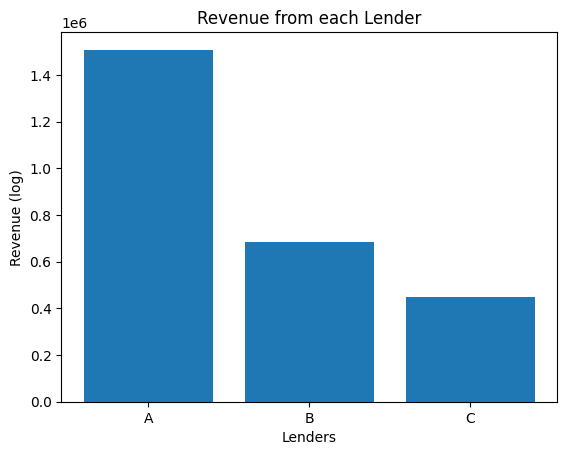

In [ ]:
# Current Revenue

# A = 6031 * 250 = 1,507,750
a_revenue = 6031 * 250

# B = 1960 * 350 = 686,000
b_revenue = 1960 * 350

# C = 2985 * 150 = 447,750
c_revenue = 2985 * 150

# current total revenue = 2,641,500
total_rev = a_revenue + b_revenue + c_revenue

print("Total Current Revenue: ", total_rev)
x_index = ['A', 'B', 'C']

plt.bar(x_index, [a_revenue, b_revenue, c_revenue])
plt.yscale('linear')
plt.xlabel("Lenders")
plt.ylabel("Revenue (log)")
plt.title("Revenue from each Lender")
plt.show()

**Raising Revenue**

We will try to move some applicants to different lenders based on the fit characteristics listed earlier.

Since Lender C is primarily targeting people with lower incomes and FICO scores, we will move those with high incomes and FICO scores to Lender B.

Specifically those who have a FICO score greater than 730 and an annual gross income greater than $96,000.

In [ ]:
# Transferring people with high FICO scores and high incomes from Lender C to B

# Retrieve the number of people with FICO score >730 and an annual gross income >96000 from Lender C
filtered_c = df[(df['Lender'] == 'C') & (df['FICO_score'] > 730) & (df['Yearly_Gross_Income'] > 96000)]
approved_c = filtered_c[filtered_c['Approved'] == 1]

# Retrieve the number of people with FICO score >730 and an annual gross income >96000 from Lender B
filtered_b = df[(df['Lender'] == 'B') & (df['FICO_score'] > 730) & (df['Yearly_Gross_Income'] > 96000)]
approved_b = filtered_b[filtered_b['Approved'] == 1]

# Currently 605 people meet the characteristics set out (high FICO score and high income) who applied
# for a loan from Lender C.
print("Number of people with characteristics in C:", filtered_c.shape[0])

# 304 approved with those characteristics
print("Approved with these characteristics in C:", approved_c.shape[0])

# We are moving everyone from filtered C to filtered B so we must subtract the approved from C
# 2985 - 304
c_revenue = 2681 * 150

# The acceptance rate for lender B for people with these characteristics was 577/1528 = 0.3776
accept_rate = approved_b.shape[0]/filtered_b.shape[0]
print("Acceptance rate of B:", accept_rate)

# We must add the filtered C to filtered B
# 1528 + 605 = 2133
new_b_total = filtered_b.shape[0] + filtered_c.shape[0]
print("New total number of people in filtered B:", new_b_total)

# Multiple the acceptance rate by the new total number of people in filtered B
new_accept_num_b = round(new_b_total * accept_rate)
print("New number of people to be approved:", new_accept_num_b)

# Subtract original number of accepted people in B by the original number of people accepted with
# those characteristics + the new number of accepted people with those characteristics
new_total_accept_b = 1960 - approved_b.shape[0] + new_accept_num_b
print("New total number of people approved for a loan from B:", new_total_accept_b)

# Find the new revenue from B
b_new_rev = new_total_accept_b * 350
print("The new revenue from B:", b_new_rev)



Number of people with characteristics in C: 605
Approved with these characteristics in C: 304
Acceptance rate of B: 0.3776178010471204
New total number of people in filtered B: 2133
New number of people to be approved: 805
New total number of people approved for a loan from B: 2188
The new revenue from B: 765800


In [ ]:
# Recalculating the Revenue with New Values

# Lender A: Remains the same

# Lender B:
b_revenue = b_new_rev

# Lender C = original - amount earned from the targeted group
original_target_rev = approved_c.shape[0] * 150
c_revenue - original_target_rev

# New total revenue is 2,675,700 which is a gain of 34,200
updated_total_rev = a_revenue + b_revenue + c_revenue
print("New Total Revenue:", updated_total_rev)

New Total Revenue: 2675700


Now we will move people with a 'poor' FICO score rating from Lender B to Lender C since the latter still accepts some people with a poor rating while the former rejects everyone with a poor rating.

In [ ]:
# Retrieve the number of people who are in the FICO Score group of "poor" among Lender C applicants
filtered_c_poor = df[(df['Lender'] == 'C') & (df['Fico_Score_group'] == 'poor')]
approved_c_poor = filtered_c[filtered_c['Approved'] == 1]

# Retrieve the number of people with FICO Score group of "poor" among Lender B applicants
filtered_b_poor = df[(df['Lender'] == 'B') & (df['Fico_Score_group'] == 'poor')]
approved_b_poor = filtered_b[filtered_b['Approved'] == 1]

# 5058 people with a poor FICO score rating from Lender C
print("Number of people with poor FICO score in C:", filtered_c_poor.shape[0])

# 304 approved with a poor FICO score from Lender C
print("Number of approvals with poor FICO score in C:", approved_c_poor.shape[0])

# Acceptance rate for people with a poor FICO score rating from C is 0.0601
accept_rate_poor = approved_c_poor.shape[0]/filtered_c_poor.shape[0]
print("Poor FICO Score rating approval rate:", accept_rate_poor)

# 7774 people with a poor FICO score rating from Lender B
print("Number of people with poor FICO score in B:", filtered_b_poor.shape[0])

# 0 approved with a poor FICO score from Lender B
print("Number of approvals with poor FICO score in B:", approved_b_poor.shape[0])

# Add the number of people with a poor FICO rating in B to filtered C to get a new total
new_c_poor_total = filtered_b_poor.shape[0] + filtered_c_poor.shape[0]
print("New number of people with a poor rating in C:", new_c_poor_total)

# Multiply the rate by the new total
new_approved_c_poor = round(new_c_poor_total * accept_rate_poor)
print("New number of approved applications with a poor FICO rating:", new_approved_c_poor)

# New total accepted people by Lender C
new_total_accept_c = 2681 - approved_c_poor.shape[0] + new_approved_c_poor
print("New total number of accepted people by Lender C:", new_total_accept_c)

Number of people with poor FICO score in C: 5058
Number of approvals with poor FICO score in C: 304
Poor FICO Score rating approval rate: 0.060102807433768286
Number of people with poor FICO score in B: 7774
Number of approvals with poor FICO score in B: 577
New number of people with a poor rating in C: 12832
New number of approved applications with a poor FICO rating: 771
New total number of accepted people by Lender C: 3148


In [ ]:
# Calculating the New Total Revenue

# Lender A remains the same

# Lender B remains the same because no one from the 'poor' group was approved

# Lender C
c_revenue = new_total_accept_c * 150
print("New C revenue:", c_revenue)

# New total revenue is 2,745,750, a gain of 70,050 from the previous updated amount
updated_total_rev_2 = a_revenue + b_revenue + c_revenue
print("New total revenue:", updated_total_rev_2)

New C revenue: 472200
New total revenue: 2745750


By shifting people around by different charactistics based on which Lender they best fit in, we have increased our revenue by **$104,250** (70,050 + 34,200).

#Considerations if Matching in Real Time



*   We need to consider whether an applicant has any current debt, and if so how much debt they have (i.e. the debt-to-income ratio)
*   The interest rate that the lender will give to the applicant

